In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list  # List all the datasets available

In [ ]:
! kaggle datasets download -d signnteam/asl-sign-language-pictures-minus-j-z
! unzip asl-sign-language-pictures-minus-j-z.zip

In [ ]:
! kaggle datasets download -d kapillondhe/american-sign-language
! unzip american-sign-language.zip

In [ ]:
!pip install mediapipe

In [ ]:
# For capturing hand coordinates
import cv2
import mediapipe as mp

# For processing data
import csv
import os
import numpy as np
import pandas as pd

In [ ]:
# Initialize mediapipe hand

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [ ]:
rows = ['class']
for i in range(1,42):
  rows.append(i)
with open('hand_dataset.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(rows)
with mp_hands.Hands( static_image_mode=True, max_num_hands=2, min_detection_confidence=0.2) as hands:
        
    directory = "/content/ASL_Dataset/Train"

    d = sorted(os.listdir(directory))
    for dir in d :
      filedir = os.path.join(directory, dir)
      success = 0
      for fil in os.listdir(filedir) :

        filepath = os.path.join(filedir, fil)
        image = cv2.flip(cv2.imread(filepath), 1)
        print("processing file: ", filepath)

        # Convert the BGR image to RGB before processing.
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        try :
            # Extract Hand landmarks
            print("trying")
            for hand_landmark in results.multi_hand_landmarks:
                right_hand = hand_landmark.landmark

            #right_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in right_hand]).flatten())
            right_hand_row = list(np.array([[landmark.x, landmark.y] for landmark in right_hand]).flatten())

            # Concate rows
            row = right_hand_row

            row.insert(0, filepath.split('/')[3])

            # Export to CSV
            with open('hand_dataset.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
                
            success += 1
            
        except :
            print("expect: not trying")
            pass

In [ ]:
df = pd.read_csv('./hand_datas.csv')

rows = len(df.axes[0])
  
# computing number of columns
cols = len(df.axes[1])
  
print(df)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

# Now Train Your Neural Network with CSV Data

In [107]:
import mediapipe as mp
import cv2


import pandas as pd
import os
import pandas as pd
import numpy as np
# from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.utils import to_categorical, normalize

from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [116]:
def trainsave():
    training_data = pd.read_csv("./Data/hand_dataset.csv")

    features = training_data.copy()
    string_labels = np.array(features.pop('class'))

    # Get only unique labels from list of all label class names
    unique_labels = np.unique(string_labels)

    # Save Labels in file for use in prediction
    file = open("arr", "wb")
    np.save(file, unique_labels)
    file.close()

    integer_mapping = {x: i for i,x in enumerate(unique_labels)}
    vec = []
    for values in string_labels :
        vec.append(integer_mapping[values])

    # Converts a class vector (integers) to binary class matrix # one hot encoding
    labels = to_categorical(vec)

    X_train, X_test, y_train, y_test = train_test_split(features,
                                                        labels,
                                                        test_size=0.33,
                                                        random_state=42,
                                                        shuffle=True,
                                                        )

    model = Sequential()
    model.add(Dense(42, activation='relu'),)
    model.add(Dense(64 ,activation='relu'))
    model.add(Dense(64 ,activation='relu'))
    model.add(Dense(len(unique_labels), activation='softmax'))

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    opt = tf.keras.optimizers.SGD(learning_rate=0.1)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


    #function is a convenient way of letting the model train until an optimum is found
#     es = tf.keras.callbacks.EarlyStopping(
#         monitor='val_loss',
#         mode='min',
#         verbose=1,
#         patience=10,
#         restore_best_weights=True)

    history = model.fit(X_train, y_train,
          # batch_size=1000,
          epochs=120,
          verbose=1,
          shuffle=True,
          validation_data=(X_test, y_test),
#           callbacks=[es]
                       )

    # model.fit(X_train, y_train, epochs=100)
    # model.evaluate(X_test,  y_test, verbose=2)

    model.save("./Data/mymodel2")
    return history



In [117]:
history = trainsave()

Epoch 1/120
170/170 [==============================] - 1s 3ms/step - loss: 3.1515 - accuracy: 0.0749 - val_loss: 3.0080 - val_accuracy: 0.1449
Epoch 2/120
170/170 [==============================] - 0s 2ms/step - loss: 2.8985 - accuracy: 0.1564 - val_loss: 2.5187 - val_accuracy: 0.2028
Epoch 3/120
170/170 [==============================] - 0s 2ms/step - loss: 2.5446 - accuracy: 0.2053 - val_loss: 2.5121 - val_accuracy: 0.2021
Epoch 4/120
170/170 [==============================] - 1s 5ms/step - loss: 2.2924 - accuracy: 0.2583 - val_loss: 2.3908 - val_accuracy: 0.2484
Epoch 5/120
170/170 [==============================] - 1s 8ms/step - loss: 2.0590 - accuracy: 0.3295 - val_loss: 1.6504 - val_accuracy: 0.5103
Epoch 6/120
170/170 [==============================] - 1s 8ms/step - loss: 1.7979 - accuracy: 0.4116 - val_loss: 2.4144 - val_accuracy: 0.2234
Epoch 7/120
170/170 [==============================] - 0s 2ms/step - loss: 1.6761 - accuracy: 0.4366 - val_loss: 1.3383 - val_accuracy: 0.6119

Epoch 58/120
170/170 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8605 - val_loss: 0.5100 - val_accuracy: 0.8409
Epoch 59/120
170/170 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8654 - val_loss: 0.4718 - val_accuracy: 0.8577
Epoch 60/120
170/170 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8574 - val_loss: 0.4644 - val_accuracy: 0.8607
Epoch 61/120
170/170 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8602 - val_loss: 0.4258 - val_accuracy: 0.8849
Epoch 62/120
170/170 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8785 - val_loss: 0.7840 - val_accuracy: 0.7710
Epoch 63/120
170/170 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.8425 - val_loss: 0.4741 - val_accuracy: 0.8581
Epoch 64/120
170/170 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.8317 - val_loss: 0.4724 - val_accuracy:

Epoch 115/120
170/170 [==============================] - 1s 3ms/step - loss: 0.2476 - accuracy: 0.9210 - val_loss: 0.3690 - val_accuracy: 0.9062
Epoch 116/120
170/170 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9241 - val_loss: 0.3598 - val_accuracy: 0.8995
Epoch 117/120
170/170 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9295 - val_loss: 0.4173 - val_accuracy: 0.8894
Epoch 118/120
170/170 [==============================] - 0s 3ms/step - loss: 0.2182 - accuracy: 0.9244 - val_loss: 0.4259 - val_accuracy: 0.8887
Epoch 119/120
170/170 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8918 - val_loss: 0.4966 - val_accuracy: 0.8573
Epoch 120/120
170/170 [==============================] - 0s 3ms/step - loss: 0.2881 - accuracy: 0.9015 - val_loss: 0.3725 - val_accuracy: 0.9044
INFO:tensorflow:Assets written to: ./Data/mymodel2/assets


INFO:tensorflow:Assets written to: ./Data/mymodel2/assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


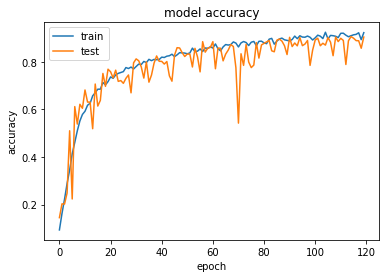

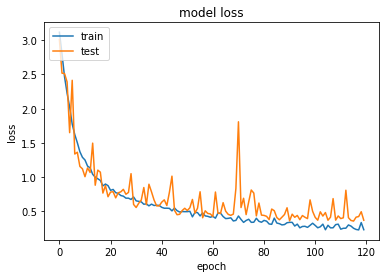

In [118]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [127]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

In [130]:
import datetime

model = tf.keras.models.load_model("./Data/mymodel2")

#read the file to numpy array
file = open("arr", "rb")
class_list = np.load(file, allow_pickle=True)

cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture('rtsp://25.174.108.223:8080/h264_ulaw.sdp')
# capture = cv2.VideoCapture('rtsp://25.174.108.223:8080/1')

image = cv2.imread("./Data/MY.png")
img = ResizeWithAspectRatio(image, width=700) 
winname = "Sign Language"
cv2.namedWindow(winname)        # Create a named window
cv2.moveWindow(winname, 1200,0)  # Move it to (40,30)
cv2.imshow(winname, img)
# cv2.imshow('image', cv2.imread('asl.jpg'))

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
drawing_styles = mp.solutions.drawing_styles

timestart = datetime.datetime.now()
word = " "

with mp_hands.Hands(
    max_num_hands = 1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()
        
       
        
        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue

        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        results = hands.process(image)

        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        cv2.putText(image, word
                        , (100, 450), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coords = hand_landmarks.landmark
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                coords = list(np.array([[landmark.x, landmark.y] for landmark in coords]).flatten())
                # coords = scaler.transform([coords])
                
                # Alternative for dataset using z coordinates.
                # Z coordinates is not recommended, since you need to adjust your distance from camera.
#                 coords = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in coords]).flatten())
                rgb_tensor = tf.convert_to_tensor(coords, dtype=tf.float32)

                ##Add dims to rgb_tensor
                rgb_tensor = tf.expand_dims(rgb_tensor , 0)
                predict = model.predict(rgb_tensor, steps=1)
                predicted = class_list[np.argmax(predict[0])]
                
                # predicted = model.predict(coords)

            # Get status box
            cv2.rectangle(image, (0,0), (100, 60), (245, 90, 16), -1)

            # Display Class
            cv2.putText(image, 'CLASS'
                        , (20,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
            cv2.putText(image, str(predicted[0])
                        , (20,45), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            
            
            diff =  datetime.datetime.now() - timestart
            if word[len(word)-1] == str(predicted[0]):
                timestart = datetime.datetime.now()     
            else:
                if diff.total_seconds()*1000 > 1000:
                    timestart = datetime.datetime.now()
                    word = word + str(predicted[0])
                    print(word)
        else: 
            diff =  datetime.datetime.now() - timestart
            if word[len(word)-1] == " ":
                timestart = datetime.datetime.now()     
            else:
                if diff.total_seconds()*1000 > 1000:
                    timestart = datetime.datetime.now()
                    word = word + " "
                    print(word)
            


                    

        cv2.imshow('MediaPipe Hands', image)

        # Press esc to close webcam
        if cv2.waitKey(1) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()



 A
 AC
 ACO
 ACOD
 ACODE
 ACODEF
 ACODEFC
 ACODEFCW
 ACODEFCWG
 ACODEFCWGH
 ACODEFCWGHT
 ACODEFCWGHTA
 ACODEFCWGHTAI
 ACODEFCWGHTAIL
 ACODEFCWGHTAILN
 ACODEFCWGHTAILNO
 ACODEFCWGHTAILNOB
 ACODEFCWGHTAILNOBO
 ACODEFCWGHTAILNOBOP
 ACODEFCWGHTAILNOBOPQ
 ACODEFCWGHTAILNOBOPQR
 ACODEFCWGHTAILNOBOPQRM
 ACODEFCWGHTAILNOBOPQRMA
 ACODEFCWGHTAILNOBOPQRMA 
 ACODEFCWGHTAILNOBOPQRMA R
 ACODEFCWGHTAILNOBOPQRMA RU
 ACODEFCWGHTAILNOBOPQRMA RUW
 ACODEFCWGHTAILNOBOPQRMA RUWX
 ACODEFCWGHTAILNOBOPQRMA RUWXY
 ACODEFCWGHTAILNOBOPQRMA RUWXY 
